# Bibliotecas

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from shapely.geometry import Polygon

# Geração de dados

## Gerar dados do arranjo

In [2]:
def arranjo(rho, espaco, passo):
  coleta = espaco
  passo = passo
  rho = rho
  passox = np.arange(0, coleta, passo)
  coletaz = int(coleta/passo)
  passoz = np.zeros([coletaz], int)
  gama = 6.67*10**(-11)                                                                       
  si2mg = 10**5                                                                                 
  km2m = 10*3 
  c = 2*gama*rho*si2mg*km2m
  df = pd.DataFrame([{'constante': c,
                     'passo_x': passox,
                     'passo_z': passoz}])
  return df



## Gerar dados do poligono

In [3]:
def poli_3(x1, x2, x3, z1, z2, z3):
  poli = pd.DataFrame([{'x': [x1, x2, x3, x1],
                        'z': [z1, z2, z3, z1]}])
  return poli

## Cálculo desses dados gerados

In [4]:
def calculo_3(arranjo, poli_3):
  tam_coleta = len(arranjo['passo_x'][0])
  tam_poly = len(poli_3['x'][0]) - 1
  li = np.arange(0,tam_coleta)
  ln = np.arange(0,tam_poly)
  erri = pd.DataFrame([[0. for col in ln] for row in li])        # Defindo um dataframe para o valor de 'r'
  teta = pd.DataFrame([[0. for col in ln] for row in li])        # Defindo um dataframe para o valor de 'teta'
  alfa = pd.DataFrame([[0. for col in ln] for row in li])        # Defindo um dataframe para o valor de 'alfa'
  beta = pd.DataFrame([[0. for col in ln] for row in li])        # Defindo um dataframe para o valor de 'beta'
  soma = pd.DataFrame([[0. for col in ln] for row in li])        # Definindo um dataframe para os valores da "soma"
  
  for i in li:
    for n in ln:
      xn = poli_3['x'][0][n] - arranjo['passo_x'][0][i]
      zn = poli_3['z'][0][n] - arranjo['passo_z'][0][i]
      xn1 = poli_3['x'][0][n+1] - arranjo['passo_x'][0][i]
      zn1 = poli_3['z'][0][n+1] - arranjo['passo_z'][0][i]

      dxn = xn1 - xn
      dzn = zn1 - zn

      if dzn == 0:
        dzn = 10**(-6)

      if dxn == 0:
        dxn = 10**(-6)

      a = dxn / dzn
      b = xn - a*zn

      r = math.sqrt(xn**2 + zn**2)
      t = math.atan2(zn,xn)

      erri[n][i] = r
      teta[n][i] = t
      alfa[n][i] = a
      beta[n][i] = b

  erri[3] = erri[0]                                                                       # Copiando a primeira coluna
  teta[3] = teta[0]                                                                       # Copiando a primeira coluna

  for i in li:
    for n in ln:
      t1 = (beta[n][i] / ( 1 + (alfa[n][i]**2)))
      t2 = math.log(erri[n+1][i] / erri[n][i])
      t3 = teta[n+1][i] - teta[n][i]

      soma[n][i] = t1*(t2 -alfa[n][i]*t3)
  
  soma = soma.sum(axis=1)*arranjo['constante'][0]

  resultados = pd.DataFrame([{'r': erri,
                              't': teta,
                              'a': alfa,
                              'b': beta,
                              'anomalia': soma}])
  
  return resultados
    



## Plotando gráfico

In [13]:
def plot_graf(arranjo, poligono, calculo):
  plt.figure(figsize=(16, 8))
  sns.lineplot(x = arranjo['passo_x'][0], y = calculo['anomalia'][0], marker="o")
  plt.title('Gráfico da Anomalia', fontsize = 20)
  plt.xlabel('Arranjo em km')
  plt.ylabel('Variação gravimétrica em mGal')
  plt.show()
  plt.figure(figsize=(16, 8))
  sns.lineplot(x = arranjo['passo_x'][0], y = calculo['anomalia'][0], marker="o")
  plt.title('Representação dos vértices da figura em 2D com a anomalia', fontsize = 20)
  plt.xlabel('Eixo X em km')
  plt.ylabel('Eixo Z em km')
  sns.scatterplot(x = poligono['x'][0], y = poligono['z'][0])
  plt.show()
  

## Exemplo caso_1

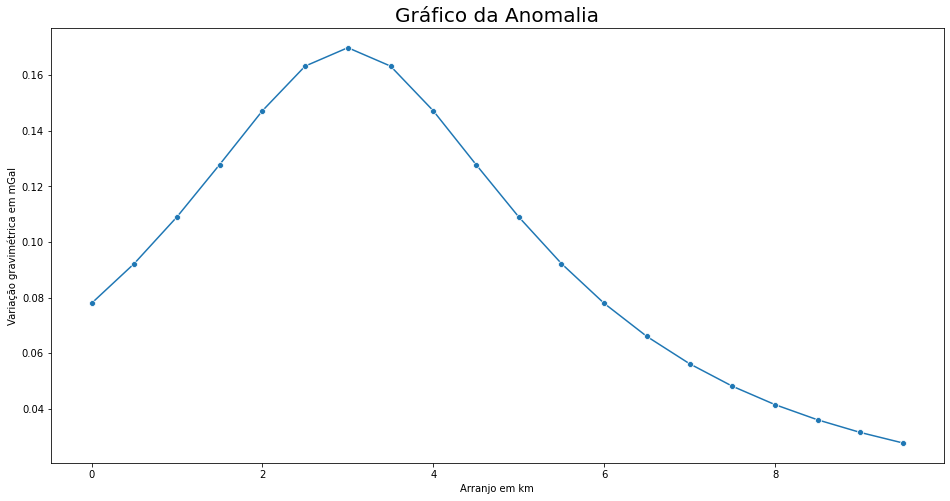

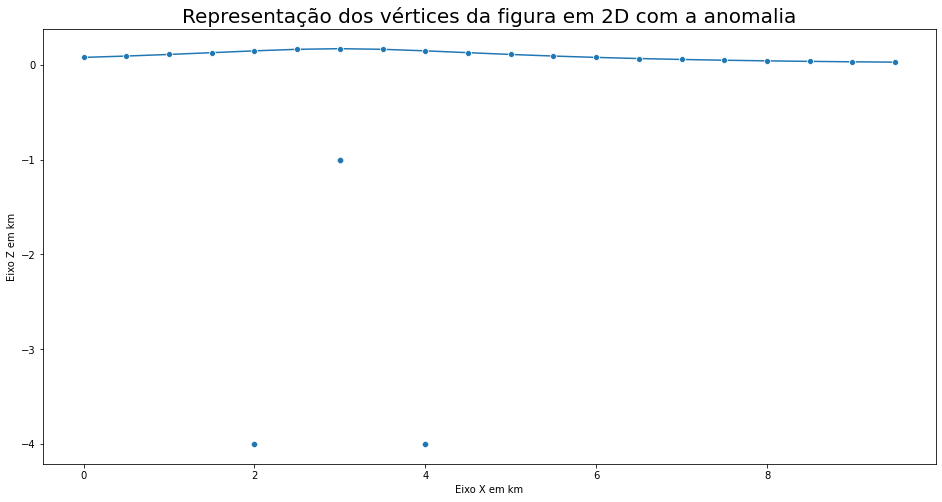

In [14]:
arranjo_1 = arranjo(400, 10, 0.5)
poly_1 = poli_3(3, 4, 2, -1, -4, -4)
cal_1 = calculo_3(arranjo_1, poly_1)
plot_graf(arranjo_1, poly_1, cal_1)